In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [3]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
le=LabelEncoder()

In [8]:
data['Extracurricular Activities']=le.fit_transform(data['Extracurricular Activities'])

In [9]:
data['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 9873, dtype: int32

In [10]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

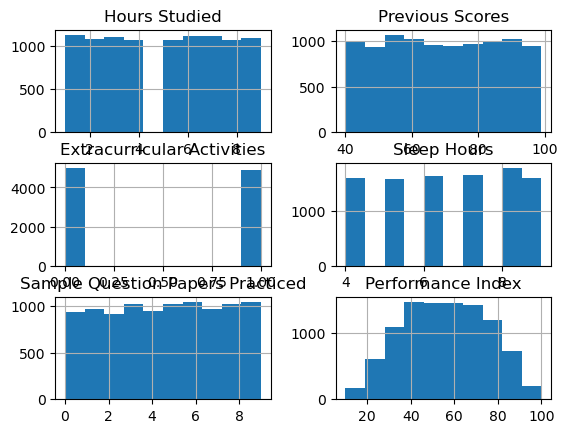

In [11]:
data.hist()

In [12]:
data.skew()

Hours Studied                      -0.003348
Previous Scores                     0.005581
Extracurricular Activities          0.020059
Sleep Hours                        -0.041350
Sample Question Papers Practiced   -0.034893
Performance Index                  -0.000412
dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [15]:
scaler=StandardScaler()
data["Hours Studied"]=scaler.fit_transform(data[["Hours Studied"]])
data["Previous Scores"]=scaler.fit_transform(data[["Previous Scores"]])
data["Extracurricular Activities"]=scaler.fit_transform(data[["Extracurricular Activities"]])
data["Sleep Hours"]=scaler.fit_transform(data[["Sleep Hours"]])
data["Sample Question Papers Practiced"]=scaler.fit_transform(data[["Sample Question Papers Practiced"]])

In [16]:
x=data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y=data["Performance Index"]

In [17]:
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444


In [18]:
x.shape,y.shape

((9873, 5), (9873,))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape,x_test.shape

((7898, 5), (1975, 5))

In [22]:
y_train.shape,y_test.shape

((7898,), (1975,))

In [23]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
model.intercept_, model.coef_

(55.204468958980186,
 array([ 7.38115319, 17.64402442,  0.28689706,  0.80139015,  0.54102419]))

In [26]:
predicted_val= model.predict(x_test)

In [27]:
predicted_val

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

In [29]:
mean_squared_error(y_test,predicted_val)*100

430.5900938538476

In [31]:
r2_score(y_test,predicted_val)

0.9884301209927054

In [32]:
from sklearn.preprocessing import PolynomialFeatures


In [35]:
polynomial=PolynomialFeatures(degree=2)
poly_features=polynomial.fit_transform(x_train)
model=LinearRegression()
model.fit(poly_features,y_train)

LinearRegression()

In [36]:
model.coef_,model.intercept_

(array([ 0.00000000e+00,  7.38032644e+00,  1.76446200e+01,  2.03815290e+08,
         8.02701191e-01,  5.41158604e-01,  2.21319361e-02,  3.38225025e-04,
         1.81042642e-02,  4.30064812e-02,  1.83989556e-02, -2.24941675e-02,
         2.05014964e-02,  9.88260159e-03, -2.02832268e-02, -1.01624605e+10,
        -9.31678772e-03, -2.28325441e-02,  2.50354517e-02,  2.40294739e-02,
         1.86424199e-03]),
 10162460578.195724)

In [37]:
test_features=polynomial.fit_transform(x_test)

In [38]:
pred=model.predict(test_features)

In [1]:
from sklearn.svm import SVC,SVR